Simulate some trials of silhouettes based on hierarchical (perceptual) chunks. Most of these silhouettes will only have one solution.

There are three conditions:
i) silhouettes composed of two chunks
ii) silhouettes composed of one chunk and two additional primitive building blocks
iii) silhouettes composed of four primitive building blocks.

We'll try to match the marginal probabilities of primitive building blocks by adding preferably those to ii) and iii) that are not used in a chunk.

Next: find out whether more than one solution for these trials exists. This will generate a stimulus set for training subjects on perceptual hierarchies, with stimuli that only have 1 solution (ideal for training), and stimuli that have more than one solution (ideal for testing).

In [175]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [176]:
#@title Helper functions for plotting

def mkPlot_subplots_LinIdx(form_linIdx,n_grid=20,n_grid_reduced=10,title='Stim ',cols=3,rows=3):

  # uses linear indexing

  fig = plt.figure() 

  for idx_BB in np.arange(np.size(form_linIdx,0)):

    BB = np.zeros((n_grid,n_grid))
    BB[np.unravel_index(form_linIdx[idx_BB], (n_grid,n_grid), order='F')] = 1 

    fig.add_subplot(cols, rows, idx_BB+1)

    plt.imshow(mkReduceGrid(BB,n_grid_reduced), cmap='Greys')
    plt.axis('off')
    plt.title(title + str(idx_BB))

  plt.show()

def mkPlot_subplots(form_matrix,plot_idx,n_grid_reduced=10,title='Stim ',cols=5,rows=5):
  
  # uses matrix code

  fig = plt.figure() 

  fig_count = 1;
  
  for idx_BB in plot_idx:

    BB = form_matrix[idx_BB,:,:]

    fig.add_subplot(rows, cols, fig_count)

    plt.imshow(mkReduceGrid(BB,n_grid_reduced), cmap='Greys')
    plt.axis('off')
    plt.title(title + str(idx_BB))

    fig_count += 1

    # print(coord_Blocks[:,:,idx_BB])

  plt.show()


def mkPlot_stim(form_matrix,n_grid_reduced=10,title='Stim'):

  # uses matrix code

  plt.imshow(mkReduceGrid(form_matrix,n_grid_reduced), cmap='Greys')
  plt.axis('off')
  plt.title(title)
  plt.show()

In [177]:
#@title Helper function crop silhouette mkCrop()
# returns form without additional padding, also size info
def mkCrop(FORM,output='reduced'):

  min_x = np.min(np.where(np.sum(FORM,axis=0)!=0))
  max_x = np.max(np.where(np.sum(FORM,axis=0)!=0))

  min_y = np.min(np.where(np.sum(FORM,axis=1)!=0))
  max_y = np.max(np.where(np.sum(FORM,axis=1)!=0))

  FORM_crop = FORM[min_y:max_y+1,min_x:max_x+1]

  range_x = max_x - min_x + 1;
  range_y = max_y - min_y + 1;

  if output == 'full':
    return FORM_crop, range_x, range_y, min_x, max_x, min_y, max_y
  elif output == 'reduced':
    return FORM_crop

In [178]:
#@title Helper function reduce grid silhouette mkReduceGrid()
# Function to reduce grid
def mkReduceGrid(FORM,n_grid_reduced):

  FORM_crop, range_x, range_y, min_x, max_x, min_y, max_y = mkCrop(FORM,'full')

  # Form_Reduced  = FORM[min_y:max_y+1+n_grid_reduced-range_y,min_x:max_x+1+n_grid_reduced-range_x]

  x_pad = (n_grid_reduced-range_x)/2
  y_pad = (n_grid_reduced-range_y)/2

  x_pad1 = int(np.floor(x_pad))
  x_pad2 = int(np.ceil(x_pad))

  y_pad1 = int(np.floor(y_pad))
  y_pad2 = int(np.ceil(y_pad))

  Form_Reduced = np.pad(FORM_crop, ((y_pad1, y_pad2), (x_pad1, x_pad2)), 'constant', constant_values=0)

  return Form_Reduced

In [179]:
# Settings for stim simulation
n_sim   = 210 # how many stims to simulate
n_sim_minesweeper = 63
do_plot = True; # plot stims and solutions

n_grid_reduced = 10 # grid size of output
n_grid         = 20 # simulate in large grid, then change to n_grid_reduced for output

n_blocks       = 4 # how many primitive blocks to use in a silhouette
n_blocks_H     = 2 # how many chunks to use for silhouette
n_blocks_mix   = 3 # how many H and nH blocks in mixed silhouette

# find the middle of the big grid to place the first building block
starting_point = int(n_grid**2/2-(n_grid/2))

# define different trial types
# 0 <=> silhouette consists of 2 chunks
# 1 <=> silhouette consists of 1 chunk and 2 primitive building blocks
# 2 <=> silhouette consists of 4 primitive building blocks
trial_type = np.random.permutation(np.tile(np.array([0,1,2]), 70))
trial_type_minesweeper = np.random.permutation(np.tile(np.array([0,1,2]), 21))

# chunk_type = 0
# chunk_type = 1
# chunk_type = 2
chunk_type = 3

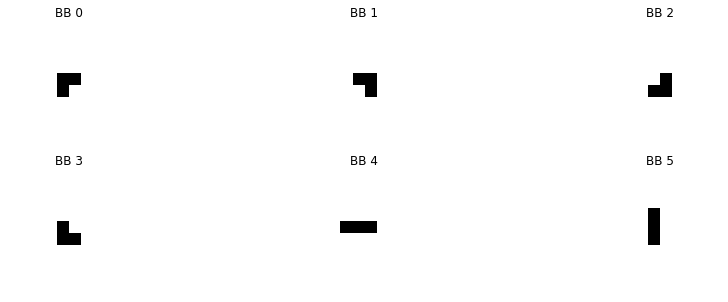

In [180]:
# define shape of primite building blocks:
form_BB = [
          [starting_point-1, starting_point,            starting_point+(n_grid-1)],
          [starting_point-1, starting_point+(n_grid-1), starting_point+n_grid],
          [starting_point,   starting_point+n_grid,     starting_point+(n_grid-1)],
          [starting_point,   starting_point-1,          starting_point+n_grid],
          [starting_point,   starting_point+n_grid,     starting_point+n_grid*2],
          [starting_point,   starting_point-1,          starting_point-2]
          ]

if do_plot:
  mkPlot_subplots_LinIdx(form_BB,n_grid,n_grid_reduced,'BB ',2,3)

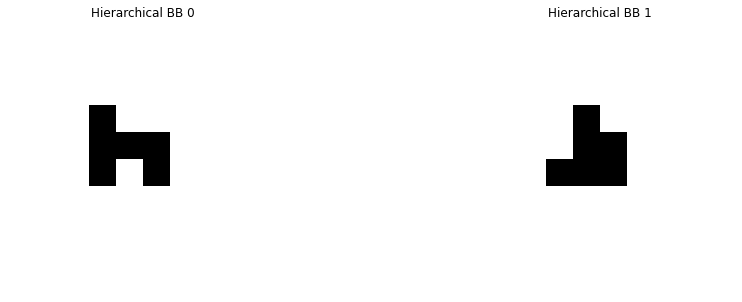

In [181]:
# define shape of some chunks:
if chunk_type==0:
  solutions_HBB  = [[0,1], [3,5]]
  form_BB_H = [
              form_BB[0] + [x + n_grid*2 for x in form_BB[1]],
              [x -1 for x in form_BB[3]] + [x + n_grid*2 for x in form_BB[5]]
              ]
  block_code_HBB = [[0,0,1,1,0,1], [3,5,3,3,5,5]]

  # find the ordering via
  # Form_find = np.zeros((n_grid,n_grid))
  # Form_find[np.unravel_index(form_BB_H[0], (n_grid,n_grid), order='F')] = 1
  # Form_find[np.unravel_index(form_BB_H[1], (n_grid,n_grid), order='F')] = 1
  # Form_find[np.where(Form_find==1)] = [1, 2, 3, 4, 5, 6]
  # print(Form_find)

elif chunk_type==1:
  solutions_HBB  = [[4,5], [3,2]]

  form_BB_H = [
              form_BB[5] + [x - n_grid -3 for x in form_BB[4]],
              form_BB[2] + [x + n_grid -2  for x in form_BB[3]]
              ]
  block_code_HBB = [[4,4,4,5,5,5], [3,3,3,2,2,2]]

  # find the ordering via
  # Form_find = np.zeros((n_grid,n_grid))
  # Form_find[np.unravel_index(form_BB_H[0], (n_grid,n_grid), order='F')] = 1
  # Form_find[np.unravel_index(form_BB_H[1], (n_grid,n_grid), order='F')] = 1
  # Form_find[np.where(Form_find==1)] = [1, 2, 3, 4, 5, 6]
  # print(Form_find)

elif chunk_type==2:
  solutions_HBB  = [[1,4], [2,0]]

  form_BB_H = [
              form_BB[4] + [x - 1 for x in form_BB[1]],
              form_BB[2] + [x + n_grid*2 -1  for x in form_BB[0]]
              ]
  block_code_HBB = [[1,1,1,4,4,4], [0,0,2,0,2,2]]

  # find the ordering via
  # Form_find = np.zeros((n_grid,n_grid))
  # Form_find[np.unravel_index(form_BB_H[0], (n_grid,n_grid), order='F')] = 1
  # Form_find[np.unravel_index(form_BB_H[1], (n_grid,n_grid), order='F')] = 1
  # Form_find[np.where(Form_find==1)] = [1, 2, 3, 4, 5, 6]
  # print(Form_find)

elif chunk_type==3:
  solutions_HBB  = [[5,1], [4,3]]

  form_BB_H = [
              form_BB[5] + [x + n_grid for x in form_BB[1]],
              form_BB[4] + [x + n_grid -1  for x in form_BB[3]]
              ]
  block_code_HBB = [[5,5,1,1,5,1], [3,3,3,4,4,4]]

  # find the ordering via
  # Form_find = np.zeros((n_grid,n_grid))
  # Form_find[np.unravel_index(form_BB_H[0], (n_grid,n_grid), order='F')] = 1
  # Form_find[np.unravel_index(form_BB_H[1], (n_grid,n_grid), order='F')] = 1
  # Form_find[np.where(Form_find==1)] = [1, 2, 3, 4, 5, 6]
  # print(Form_find)


if do_plot:
  mkPlot_subplots_LinIdx(form_BB_H,n_grid,n_grid_reduced,'Hierarchical BB ',1,np.size(form_BB_H,0))

In [182]:
def simTrial(n_grid,blocks,form_block,block_code,verbose=False,):

  # Input:
  # n_grid: size of grid
  # blocks: which blocks to use, expects array and then go through sequentially
  # form_block: shape of blocks, called by 'blocks'
  # 
  # idea is to work with linear indices on grid

  n_blocks = np.size(blocks,0)

  # initialise form
  final_Form = np.zeros((n_grid,n_grid))

  # initialise coordinates
  final_Coord = np.zeros((n_grid,n_grid))
 
  #start with first building block
  current_form = np.array(form_block[blocks[0]])  

  # obtain coordinate information in reduced grid
  final_Coord[np.unravel_index(current_form, (n_grid,n_grid), order='F')] = block_code[0] # move from linear index into grid (matrix)

  #specify bounds on grid - to control we are not moving outside of grid
  up_bound    = np.arange(n_grid**2-(n_grid-1),n_grid)
  low_bound   = np.arange((n_grid-1),n_grid**2,n_grid)
  left_bound  = np.arange(n_grid)
  right_bound = np.arange(n_grid**2-n_grid,n_grid**2)

  for idx_BB in np.arange(1,np.size(blocks,0)):

    # find possible adjacent starting points for next BB
    adj_points = np.unique(np.array([current_form-n_grid, current_form-1, current_form+n_grid, current_form+1])) # all adjacent pixels left, ontop, right, or below
    adj_points = adj_points[~np.isin(adj_points,current_form)] # can't move 'into' silhouette   
    adj_points = adj_points[adj_points>=0] # can't move out of linear grid  
    adj_points = adj_points[adj_points<=n_grid**2] # can't move out of linear grid    
    
    # now try them in random order as connection points for next building block:
    adj_points = np.random.permutation(adj_points)

    built = False
    idx_adj = 0
    
    while built == False:

        # put left bottom part (random choice) of next BB onto chosen adjacent point
        next_block = np.array(form_block[blocks[idx_BB]]) + adj_points[idx_adj] - form_block[blocks[idx_BB]][0]

        # check if we didn't move 'around' grid, if not attach
        if (
            all(np.isin(next_block,np.arange(0,n_grid**2))) and # did we move outside of grid?
            all(~np.isin(next_block,current_form)) and # is new BB overlapping with prev shape (can happen due to weird shapes of BBs)
            ~(any(np.isin(low_bound,next_block)) and any(np.isin(up_bound,next_block))) and # did we accidentally move from bottom to top of box (linear idx!)
            ~(any(np.isin(left_bound,next_block)) and any(np.isin(right_bound,next_block))) # did we accidentally move from left to right of box (linear idx!)
           ):
          
           current_form = np.concatenate((current_form, next_block), axis=0) # concatenate new block

           # obtain coordinate information in reduced grid
           final_Coord[np.unravel_index(next_block, (n_grid,n_grid), order='F')] = block_code[idx_BB] # move from linear index into grid (matrix)           

           if verbose:
             print('Done, it took ' + str(idx_adj+1) + ' attempts.')

           built = True
           
        else:
            
            idx_adj += 1

  final_Form[np.unravel_index(current_form, (n_grid,n_grid), order='F')] = 1 # move from linear index into grid (matrix)

  return final_Form, final_Coord#, final_Form_minesweep, final_Coord_minesweep

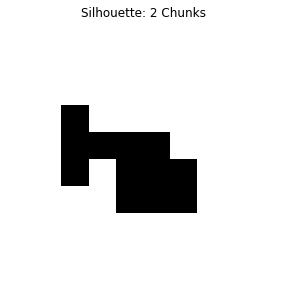

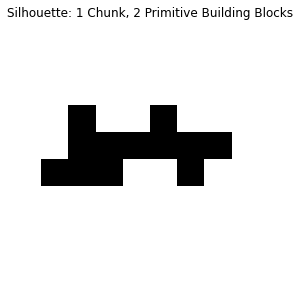

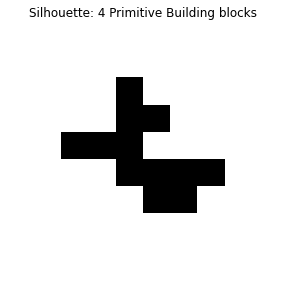

In [183]:
# check some stims:
# hierarchies (2 chunks)
use_blocks = np.random.choice(np.arange(np.size(form_BB_H,0)), size=n_blocks_H, replace=False)
use_blocks = np.random.permutation(use_blocks)

block_code = [(x+1)*10 for x in use_blocks] # +1 because 0 = background, *10 identifies hierarchies

final_Form, final_Coord = simTrial(n_grid,use_blocks,form_BB_H,block_code)

# final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)
# print(final_Coord)
# coord_Blocks = mkCoords(final_Coord,block_code_HBB)
# print(coord_Blocks)

if do_plot:
  mkPlot_stim(final_Form,n_grid_reduced,'Silhouette: 2 Chunks')

# mixed (1 chunk, 2 building blocks)
use_HBB    = np.random.choice(np.size(form_BB_H,0),1)
unused_BBs = np.setdiff1d(np.arange(np.size(form_BB,0)),np.array(solutions_HBB))
unused_BBs = np.random.permutation(unused_BBs)

use_form_BB = [form_BB_H[idx] for idx in use_HBB] + [form_BB[idx] for idx in unused_BBs]

use_blocks = np.concatenate((use_HBB, unused_BBs), axis=0)

block_code = [(x+1) for x in use_blocks] # +1 because 0 = background
block_code[0] = block_code[0]*10

final_Form, final_Coord = simTrial(n_grid,np.arange(np.size(use_blocks,0)),use_form_BB,block_code)

# final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)
# print(final_Coord)
# coord_Blocks = mkCoords(final_Coord,block_code_HBB)
# print(coord_Blocks)

if do_plot:
  mkPlot_stim(final_Form,n_grid_reduced,'Silhouette: 1 Chunk, 2 Primitive Building Blocks')

# no hierarchies (4 primitive building blocks)
use_blocks = np.random.choice(np.arange(np.size(form_BB,0)), size=n_blocks, replace=False)
use_blocks = np.random.permutation(use_blocks)

block_code = [(x+1) for x in use_blocks] # +1 because 0 = background

final_Form, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code)

# final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)
# print(final_Coord)
# coord_Blocks = mkCoords(final_Coord,block_code_HBB)
# print(coord_Blocks)

if do_plot:
  mkPlot_stim(final_Form,n_grid_reduced,'Silhouette: 4 Primitive Building blocks')

In [184]:
# important: y is dominant, find minimum y coordinate (row), then minimum x (column) therein
def mkCoords(final_Coord,block_code_HBB,n_blocks=4,verbose=False):

  coord_Blocks = np.zeros((n_blocks, 3))

  neighBours = np.zeros((n_blocks, 6)) # number blocks x number of neighbours to the (left, ontop, right, below, total number of unique neighbours)


  if np.size(np.where(final_Coord==10))!=0:
    final_Coord[np.where(final_Coord==10)] = [x+1 for x in block_code_HBB[0]] # +1 because 0 = background
  if np.size(np.where(final_Coord==20))!=0:
    final_Coord[np.where(final_Coord==20)] = [x+1 for x in block_code_HBB[1]] # +1 because 0 = background

  unique_vals = np.unique(final_Coord)
  unique_vals = unique_vals[1:] # get rid of zero
  unique_vals = unique_vals.astype(int)

  block_count = 0
  for idx_blocks in unique_vals:

    coords_Block = np.where(final_Coord==idx_blocks)

    # print(coords_Block)

    coord_Blocks[block_count,1] = min(coords_Block[0])

    coord_Blocks[block_count,0] = min(coords_Block[1][np.where(coords_Block[0]==min(coords_Block[0]))])

    # for now, start counting coordinates at 1 - change to 0 later
    # coord_Blocks[block_count,1] = min(coords_Block[0])+1

    # coord_Blocks[block_count,0] = min(coords_Block[1][np.where(coords_Block[0]==min(coords_Block[0]))])+1

    coord_Blocks[block_count,2] = idx_blocks-1 # -1 because we had to add one to differentiate from background (annoyed smiley)

    # find neighbours - this is inefficient coding but hopefully easier to read that way
    # find neighbouring grid elements (this doesn't work if we are at the border somewhere):
    coords_Block_x = coords_Block[1]
    coords_Block_y = coords_Block[0]
    coords_Block_left  = [x-1 for x in coords_Block_x]
    coords_Block_ontop = [y-1 for y in coords_Block_y]
    coords_Block_right = [x+1 for x in coords_Block_x]
    coords_Block_below = [y+1 for y in coords_Block_y]
    
    # now find left, ontop, right, below neighbours, also keep track of overall (unique) neighbouers
    all_neighbours = []

    neighbours_left = (final_Coord[tuple([coords_Block_y,coords_Block_left])])
    neighbours_left = neighbours_left[neighbours_left!=0]
    neighbours_left = neighbours_left[neighbours_left!=idx_blocks]
    neighbours_left = np.unique(neighbours_left)
    if verbose:
      print("Building Block " + str(idx_blocks) + " neighbour to left: " + str(neighbours_left))    

    neighbours_ontop = (final_Coord[tuple([coords_Block_ontop,coords_Block_x])])
    neighbours_ontop = neighbours_ontop[neighbours_ontop!=0]
    neighbours_ontop = neighbours_ontop[neighbours_ontop!=idx_blocks]
    neighbours_ontop = np.unique(neighbours_ontop)
    if verbose:
      print("Building Block " + str(idx_blocks) + " neighbour to ontop: " + str(neighbours_ontop))

    neighbours_right = (final_Coord[tuple([coords_Block_y,coords_Block_right])])
    neighbours_right = neighbours_right[neighbours_right!=0]
    neighbours_right = neighbours_right[neighbours_right!=idx_blocks]
    neighbours_right = np.unique(neighbours_right)
    if verbose:
      print("Building Block " + str(idx_blocks) + " neighbour to right: " + str(neighbours_right))

    neighbours_below = (final_Coord[tuple([coords_Block_below,coords_Block_x])])
    neighbours_below = neighbours_below[neighbours_below!=0]
    neighbours_below = neighbours_below[neighbours_below!=idx_blocks]
    neighbours_below = np.unique(neighbours_below)
    if verbose:
      print("Building Block " + str(idx_blocks) + " neighbour to below: " + str(neighbours_below))

    all_neighbours = np.append(all_neighbours,neighbours_left)
    all_neighbours = np.append(all_neighbours,neighbours_ontop)
    all_neighbours = np.append(all_neighbours,neighbours_right)
    all_neighbours = np.append(all_neighbours,neighbours_below)

    all_neighbours = np.unique(all_neighbours)

    if verbose:
      print("Building Block " + str(idx_blocks) + " neighbour in total (sum): " + str(all_neighbours) + "(" + str(len(all_neighbours)) + ")")

    neighBours[block_count,0] = idx_blocks-1
    neighBours[block_count,1] = len(neighbours_left)
    neighBours[block_count,2] = len(neighbours_ontop)
    neighBours[block_count,3] = len(neighbours_right)
    neighBours[block_count,4] = len(neighbours_below)
    neighBours[block_count,5] = len(all_neighbours)

    block_count += 1

  return coord_Blocks, neighBours

In [185]:
from pylab import *
from scipy.ndimage import measurements

def is_part(form_use,sil,min_block_size=3,n_grid=20,verbose=False):

  plaCement = np.zeros((100,np.size(sil,0),np.size(sil,1)))
  remAinder = np.zeros((100,np.size(sil,0),np.size(sil,1)))

  BB = np.zeros((n_grid,n_grid))
  BB[np.unravel_index(form_use, (n_grid,n_grid), order='F')] = 1
  BB = mkCrop(BB).astype(int)

  if verbose:
    print(sil)
    print(BB)

  row_idx = np.arange(0,np.size(sil,0)-np.size(BB,0)+1)
  col_idx = np.arange(0,np.size(sil,1)-np.size(BB,1)+1)

  is_part_count = 0

  for r_idx in row_idx:
    for c_idx in col_idx:
      temp = np.array(sil).astype(int)
      temp[r_idx:r_idx+np.size(BB,0),c_idx:c_idx+np.size(BB,1)] -= BB.astype(int)

      # print(temp)

      if np.all(temp!=-1):
        lw, num = measurements.label(temp)
        area = measurements.sum(temp, lw, index=arange(lw.max() + 1))
        # check if split in two clusters at most, and those cluster can be built with building blocks:
        if np.all(lw<3) and np.all(np.isin(area[1:],[min_block_size,min_block_size*2,min_block_size*3])):

          temp_placement = np.zeros_like(sil)
          temp_placement[r_idx:r_idx+np.size(BB,0),c_idx:c_idx+np.size(BB,1)] += BB.astype(int)          

          plaCement[is_part_count,:,:] = temp_placement
          remAinder[is_part_count,:,:] = temp

          is_part_count += 1

          if verbose:                        
            print(temp_placement)
            print(temp)
            print("Found " + str(is_part_count) + " part solutions.")
  
  plaCement = plaCement[0:is_part_count,:,:]
  remAinder = remAinder[0:is_part_count,:,:]

  return plaCement.astype(int),remAinder.astype(int),is_part_count

In [186]:
# idea: find all possible locations of building blocks, see if they would work in principle
# see if those combinations work
def find_solution(sil,form_BB):

  n_blocks = np.size(form_BB,0)

  is_part_count = np.zeros(n_blocks)

  for idx_block in np.arange(n_blocks):
    _,_,is_part_count[idx_block] = is_part(form_BB[idx_block],sil)

  is_part_count = is_part_count.astype(int)

  single_sol = np.sum(is_part_count)==4

  return single_sol,is_part_count

In [187]:
# simulate some trials
final_Sil = np.zeros((n_sim,n_grid_reduced,n_grid_reduced))
solutions = np.zeros((n_sim,4))
coord_Blocks = np.zeros((n_sim,4,4))

for idx_sim in np.arange(n_sim):

  if trial_type[idx_sim]==0: # 2 chunks
    use_blocks = np.random.choice(np.arange(np.size(form_BB_H,0)), size=n_blocks_H, replace=False) # random.choice not neccessary here but will be when more chunks

    block_code = [(x+1)*10 for x in use_blocks] # +1 because 0 = background, *10 identifies hierarchies

    single_sol = False
    while not single_sol: # ensure silhouette only has one solution
      Sil_Trial, final_Coord = simTrial(n_grid,use_blocks,form_BB_H, block_code) # get silhouette
      single_sol = find_solution(mkCrop(Sil_Trial),form_BB)

    final_Sil[idx_sim,:,:] = mkReduceGrid(Sil_Trial,n_grid_reduced)

    final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks[idx_sim,:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks[idx_sim,:,3] = idx_sim

    solutions[idx_sim,:]   = np.concatenate((solutions_HBB[use_blocks[0]], solutions_HBB[use_blocks[1]]), axis=0)

  elif trial_type[idx_sim]==1: # 1 chunk + 2 basic building blocks
    # introduce bias to match marginal probs of BBs
    use_HBB    = np.random.choice(np.size(form_BB_H,0),1) # randomly choose one chunk
    unused_BBs = np.setdiff1d(np.arange(np.size(form_BB,0)),np.array(solutions_HBB)) # choose the primitive blocks that are not used in the chunks
    unused_BBs = np.random.permutation(unused_BBs)

    use_form_BB = [form_BB_H[idx] for idx in use_HBB] + [form_BB[idx] for idx in unused_BBs] # put the shapes of the blocks we want to use in this trial together

    use_blocks = np.concatenate((use_HBB, unused_BBs), axis=0)

    block_code = [(x+1) for x in use_blocks] # +1 because 0 = background
    block_code[0] = block_code[0]*10 # *10 identifies hierarchies

    single_sol = False
    while not single_sol: # ensure silhouette only has one solution
      Sil_Trial, final_Coord = simTrial(n_grid,np.arange(np.size(use_blocks,0)),use_form_BB,block_code) # get silhouette    
      single_sol = find_solution(mkCrop(Sil_Trial),form_BB)

    final_Sil[idx_sim,:,:] = mkReduceGrid(Sil_Trial,n_grid_reduced)

    final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks[idx_sim,:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks[idx_sim,:,3] = idx_sim

    solutions[idx_sim,:]   = np.concatenate((solutions_HBB[use_blocks[0]], use_blocks[1:]), axis=0)

  elif trial_type[idx_sim]==2: # 4 random building blocks - make sure BBs not in chunks used
    # introduce bias to match marginal probs of BBs
    unused_BBs = np.setdiff1d(np.arange(np.size(form_BB,0)),np.array(solutions_HBB)) # choose the primitive blocks that are not used in the chunks
    add_BBs    = np.random.choice(np.setdiff1d(np.array(solutions_HBB),unused_BBs),2,False) # choose two more primitive blocks

    use_blocks    = np.random.permutation(np.concatenate((unused_BBs, add_BBs), axis=0))

    block_code = [(x+1) for x in use_blocks] # +1 because 0 = background

    single_sol = False
    while not single_sol: # ensure silhouette only has one solution
      Sil_Trial, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette
      single_sol = find_solution(mkCrop(Sil_Trial),form_BB)

    final_Sil[idx_sim,:,:] = mkReduceGrid(Sil_Trial,n_grid_reduced)

    final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks[idx_sim,:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks[idx_sim,:,3] = idx_sim

    solutions[idx_sim,:]   = use_blocks

  if idx_sim%10 == 0:
    print('Trial ' + str(idx_sim) + ' of ' + str(n_sim) + ' done.')

  final_Sil    = final_Sil.astype(int)
  solutions    = solutions.astype(int)
  coord_Blocks = coord_Blocks.astype(int)

Trial 0 of 210 done.
Trial 10 of 210 done.
Trial 20 of 210 done.
Trial 30 of 210 done.
Trial 40 of 210 done.
Trial 50 of 210 done.
Trial 60 of 210 done.
Trial 70 of 210 done.
Trial 80 of 210 done.
Trial 90 of 210 done.
Trial 100 of 210 done.
Trial 110 of 210 done.
Trial 120 of 210 done.
Trial 130 of 210 done.
Trial 140 of 210 done.
Trial 150 of 210 done.
Trial 160 of 210 done.
Trial 170 of 210 done.
Trial 180 of 210 done.
Trial 190 of 210 done.
Trial 200 of 210 done.


In [188]:
# simulate some minesweeper trials
final_Sil_minesweeper = np.zeros((n_sim_minesweeper,n_grid_reduced,n_grid_reduced))
solutions_minesweeper = np.zeros((n_sim_minesweeper,4))

coord_Blocks_minesweeper = np.zeros((n_sim_minesweeper,3,4))
coord_Blocks_minesweeper_occl = np.zeros((n_sim_minesweeper,1,4))

for idx_sim in np.arange(n_sim_minesweeper):

  coord_Blocks_full = np.zeros((4,4))
  # coord_Blocks_occl = np.zeros((3,4))

  if trial_type_minesweeper[idx_sim]==0: # 2 chunks
    use_blocks = np.random.choice(np.arange(np.size(form_BB_H,0)), size=n_blocks_H, replace=False) # random.choice not neccessary here but will be when more chunks

    block_code = [(x+1)*10 for x in use_blocks] # +1 because 0 = background, *10 identifies hierarchies

    Sil_Trial, final_Coord = simTrial(n_grid,use_blocks,form_BB_H, block_code) # get silhouette

    final_Sil[idx_sim,:,:] = mkReduceGrid(Sil_Trial,n_grid_reduced)

    solutions[idx_sim,:]   = np.concatenate((solutions_HBB[use_blocks[0]], solutions_HBB[use_blocks[1]]), axis=0)

  elif trial_type_minesweeper[idx_sim]==1: # 1 chunk + 2 basic building blocks
    # introduce bias to match marginal probs of BBs
    use_HBB    = np.random.choice(np.size(form_BB_H,0),1) # randomly choose one chunk
    unused_BBs = np.setdiff1d(np.arange(np.size(form_BB,0)),np.array(solutions_HBB)) # choose the primitive blocks that are not used in the chunks
    unused_BBs = np.random.permutation(unused_BBs)

    use_form_BB = [form_BB_H[idx] for idx in use_HBB] + [form_BB[idx] for idx in unused_BBs] # put the shapes of the blocks we want to use in this trial together

    use_blocks = np.concatenate((use_HBB, unused_BBs), axis=0)

    block_code = [(x+1) for x in use_blocks] # +1 because 0 = background
    block_code[0] = block_code[0]*10 # *10 identifies hierarchies

    Sil_Trial, final_Coord = simTrial(n_grid,np.arange(np.size(use_blocks,0)),use_form_BB,block_code) # get silhouette   

    final_Sil[idx_sim,:,:] = mkReduceGrid(Sil_Trial,n_grid_reduced)

    solutions[idx_sim,:]   = np.concatenate((solutions_HBB[use_blocks[0]], use_blocks[1:]), axis=0)

  elif trial_type_minesweeper[idx_sim]==2: # 4 random building blocks - make sure BBs not in chunks used
    # introduce bias to match marginal probs of BBs
    unused_BBs = np.setdiff1d(np.arange(np.size(form_BB,0)),np.array(solutions_HBB)) # choose the primitive blocks that are not used in the chunks
    add_BBs    = np.random.choice(np.setdiff1d(np.array(solutions_HBB),unused_BBs),2,False) # choose two more primitive blocks

    use_blocks    = np.random.permutation(np.concatenate((unused_BBs, add_BBs), axis=0))

    block_code = [(x+1) for x in use_blocks] # +1 because 0 = background

    Sil_Trial, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette

    final_Sil[idx_sim,:,:] = mkReduceGrid(Sil_Trial,n_grid_reduced)

    solutions[idx_sim,:]   = use_blocks

  final_Coord = mkReduceGrid(final_Coord,n_grid_reduced)  
  coord_Blocks_full[:,0:3], neighBours = mkCoords(final_Coord,block_code_HBB)
  coord_Blocks_full[:,3] = idx_sim

  # print(final_Coord)
  if np.size(np.where(neighBours[:,-1]==1))==0: # if building blocks are arranged as a circle, i.e. every block has 2 neighbours
    # ix_occl  = np.random.choice(np.arange(len(neighBours[:,0])))
    # ix_leave = np.setdiff1d(np.arange(len(neighBours[:,0])), ix_occl)

    quadrant = np.random.choice(4)    

    if quadrant == 0:
      use_x = np.min(coord_Blocks_full[:,0])
      use_y = np.min(coord_Blocks_full[coord_Blocks_full[:,0] == use_x,1])
    elif quadrant == 1:
      use_x = np.min(coord_Blocks_full[:,0])
      use_y = np.max(coord_Blocks_full[coord_Blocks_full[:,0] == use_x,1])
    elif quadrant == 2:
      use_x = np.max(coord_Blocks_full[:,0])
      use_y = np.max(coord_Blocks_full[coord_Blocks_full[:,0] == use_x,1])
    elif quadrant == 3:
      use_x = np.max(coord_Blocks_full[:,0])
      use_y = np.min(coord_Blocks_full[coord_Blocks_full[:,0] == use_x,1])
    
    ix_occl = np.all([coord_Blocks_full[:,0] == use_x,coord_Blocks_full[:,1] == use_y], axis=0)
    ix_leave = ~np.all([coord_Blocks_full[:,0] == use_x,coord_Blocks_full[:,1] == use_y], axis=0)

  else:
    ix_occl  = np.random.choice(np.where(neighBours[:,-1]==1)[0])
    ix_leave = np.setdiff1d(np.arange(len(neighBours[:,0])), ix_occl)

  coord_Blocks_minesweeper[idx_sim,:,:] = coord_Blocks_full[ix_leave,:]
  coord_Blocks_minesweeper_occl[idx_sim,:,:] = coord_Blocks_full[ix_occl,:]

  # If you want to check how it works:
  # print(final_Coord)
  # print("I've removed building block " + str(coord_Blocks_minesweeper_occl[idx_sim,:,2]+1))
  # print(coord_Blocks_minesweeper[idx_sim,:,:])
  # print(coord_Blocks_minesweeper_occl[idx_sim,:,:])

  if idx_sim%10 == 0:
    print('Trial ' + str(idx_sim) + ' of ' + str(n_sim) + ' done.')

  final_Sil_minesweeper    = final_Sil_minesweeper.astype(int)
  solutions_minesweeper    = solutions_minesweeper.astype(int) 

  coord_Blocks_full        = coord_Blocks_full.astype(int)
  coord_Blocks_minesweeper = coord_Blocks_minesweeper.astype(int)
  coord_Blocks_minesweeper_occl = coord_Blocks_minesweeper_occl.astype(int)

Trial 0 of 210 done.
Trial 10 of 210 done.
Trial 20 of 210 done.
Trial 30 of 210 done.
Trial 40 of 210 done.
Trial 50 of 210 done.
Trial 60 of 210 done.


In [189]:
coord_Blocks_csv = np.reshape(coord_Blocks,(-1,4))

np.savetxt("Block_coordinates.csv", coord_Blocks_csv, delimiter=",",
           fmt='%s',header="X,Y,ID,Trial", comments='')

# np.savetxt("Solutions.csv", solutions, delimiter=",",
#            fmt='%s',header="Block 1,Block 2,Block 3,Block 4", comments='')

np.savetxt("Trialtype.csv", trial_type, delimiter=",",
           fmt='%s',header="Trialtype", comments='')

coord_Blocks_minesweeper_csv = np.reshape(coord_Blocks_minesweeper,(-1,4))

np.savetxt("Block_coordinates_minesweeper.csv", coord_Blocks_minesweeper_csv, delimiter=",",
           fmt='%s',header="X,Y,ID,Trial", comments='')

coord_Blocks_minesweeper_occl_csv = np.reshape(coord_Blocks_minesweeper_occl,(-1,4))

np.savetxt("Block_coordinates_minesweeper_occl.csv", coord_Blocks_minesweeper_occl_csv, delimiter=",",
           fmt='%s',header="X,Y,ID,Trial", comments='')

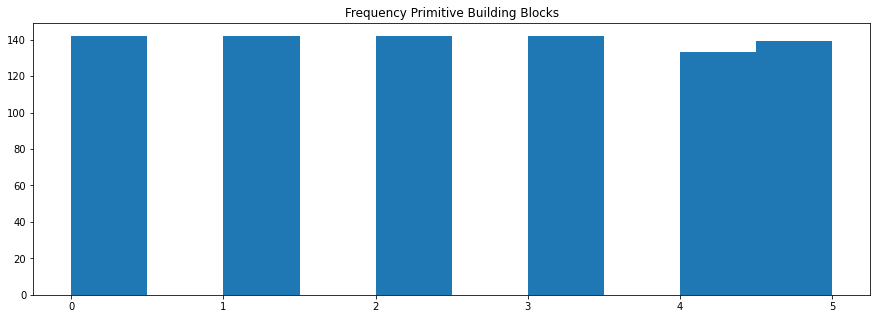

In [190]:
# histogram for building block distribution
if do_plot:
  plt.hist(solutions.flatten())
  plt.title('Frequency Primitive Building Blocks')
  plt.show()

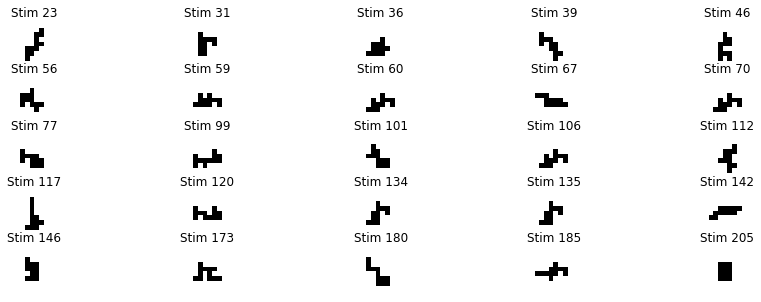

In [191]:
# plot a few stims
plot_idx = np.sort(np.random.choice(n_sim,25,False))

if do_plot:
  mkPlot_subplots(final_Sil,plot_idx,10,'Stim ',5,5)

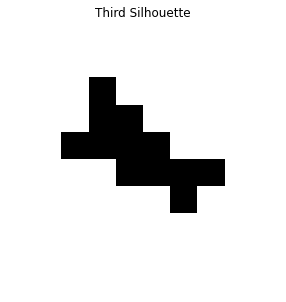

In [192]:
# mkPlot_stim(final_Sil[0,:,:],n_grid_reduced,'First Silhouette')
mkPlot_stim(final_Sil[2,:,:],n_grid_reduced,'Third Silhouette')

In [193]:
# Finally, generate some debrief stims - needs to be cleaned up
# 
# Eventually, this should be held out stims. For now, let's just do 30 trials where
# [5 trials] debrief_type = 0 <=> single chunk                             vs. 2 random primitive blocks
# [5 trials] debrief_type = 1 <=> 2 random primitive blocks                vs. 2 random primitive blocks
# [5 trials] debrief_type = 2 <=> 2 chunk silhouette                       vs. 1 chunk + 2 random primitives silhouette
# [5 trials] debrief_type = 3 <=> 2 chunk silhouette                       vs. 4 random primitive blocks
# [5 trials] debrief_type = 4 <=> 1 chunk + 2 random primitives silhouette vs. 4 random primitive blocks
# [5 trials] debrief_type = 5 <=> 4 random primitive blocks                vs. 4 random primitive blocks
# 
# Stim types
# [0] single chunk
# [1] 2 random primitive blocks
# [2] 2 chunk silhouette
# [3] 1 chunk + 2 random primitives silhouette
# [4] 4 random primitive blocks

debrief_type = np.random.permutation(np.tile(np.array([0,1,2,3,4,5]), 10))

n_debrief = np.size(debrief_type,0)

print("Simulating " + str(n_debrief) + " debrief stims")

debrief_trial = np.zeros((np.size(debrief_type,0),2))

coord_Blocks_debrief = np.zeros((n_debrief,4,4,2))

for idx_sim in np.arange(n_debrief):

  if debrief_type[idx_sim]==0: # single chunk vs. 2 random primitive blocks
    coord_Blocks_0 = np.zeros((4,4))
    coord_Blocks_1 = np.zeros((4,4))

    # stim 1: single chunk    
    use_blocks     = np.random.choice(np.size(form_BB_H,0),1) # randomly choose one chunk
    block_code     = [(x+1)*10 for x in use_blocks] # +1 because 0 = background, *10 identifies hierarchies
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB_H,block_code) # get silhouette    

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_0[:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks_0[0:2,3]    = idx_sim

    # stim 2: 2 random primitive blocks
    use_blocks     = np.random.permutation(np.random.choice(np.size(form_BB,0),2,False))
    block_code     = [(x+1) for x in use_blocks] # +1 because 0 = background
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_1[:,0:3], _ = mkCoords(final_Coord,block_code)
    coord_Blocks_1[0:2,3]    = idx_sim

    # add stims, randomise side
    side_Screen = np.random.permutation([0,1])

    debrief_trial[idx_sim,side_Screen[0]] = 0
    debrief_trial[idx_sim,side_Screen[1]] = 1

    coord_Blocks_debrief[idx_sim,:,:,side_Screen[0]] = coord_Blocks_0
    coord_Blocks_debrief[idx_sim,:,:,side_Screen[1]] = coord_Blocks_1

  elif debrief_type[idx_sim]==1: # 2 random primitive blocks vs. 2 random primitive blocks
    coord_Blocks_0 = np.zeros((4,4))
    coord_Blocks_1 = np.zeros((4,4))

    # stim 1: 2 random primitive blocks
    use_blocks     = np.random.permutation(np.random.choice(np.size(form_BB,0),2,False))
    block_code     = [(x+1) for x in use_blocks] # +1 because 0 = background
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_0[:,0:3], _ = mkCoords(final_Coord,block_code)
    coord_Blocks_0[0:2,3]    = idx_sim

    # stim 2: 2 random primitive blocks
    use_blocks     = np.random.permutation(np.random.choice(np.size(form_BB,0),2,False))
    block_code     = [(x+1) for x in use_blocks] # +1 because 0 = background
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_1[:,0:3], _ = mkCoords(final_Coord,block_code)
    coord_Blocks_1[0:2,3]    = idx_sim

    # add stims, randomise side
    side_Screen = np.random.permutation([0,1])

    debrief_trial[idx_sim,side_Screen[0]] = 1
    debrief_trial[idx_sim,side_Screen[1]] = 1

    coord_Blocks_debrief[idx_sim,:,:,side_Screen[0]] = coord_Blocks_0
    coord_Blocks_debrief[idx_sim,:,:,side_Screen[1]] = coord_Blocks_1

  elif debrief_type[idx_sim]==2: # 2 chunk silhouette vs. 1 chunk + 2 random primitives silhouette
    coord_Blocks_0 = np.zeros((4,4))
    coord_Blocks_1 = np.zeros((4,4))

    # stim 1: 2 chunk silhouette
    use_blocks     = np.random.choice(np.arange(np.size(form_BB_H,0)), size=n_blocks_H, replace=False) # random.choice not neccessary here but will be when more chunks
    block_code     = [(x+1)*10 for x in use_blocks] # +1 because 0 = background, *10 identifies hierarchies
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB_H, block_code) # get silhouette

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_0[:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks_0[:,3]      = idx_sim

    # stim 2: 1 chunk + 2 random primitives silhouette
    use_HBB        = np.random.choice(np.size(form_BB_H,0),1) # randomly choose one chunk
    unused_BBs     = np.setdiff1d(np.arange(np.size(form_BB,0)),np.array(solutions_HBB)) # choose the primitive blocks that are not used in the chunks
    unused_BBs     = np.random.permutation(unused_BBs)
    use_form_BB    = [form_BB_H[idx] for idx in use_HBB] + [form_BB[idx] for idx in unused_BBs] # put the shapes of the blocks we want to use in this trial together
    use_blocks     = np.concatenate((use_HBB, unused_BBs), axis=0)
    block_code     = [(x+1) for x in use_blocks] # +1 because 0 = background
    block_code[0]  = block_code[0]*10 # *10 identifies hierarchies
    _, final_Coord = simTrial(n_grid,np.arange(np.size(use_blocks,0)),use_form_BB,block_code) # get silhouette    

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_1[:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks_1[:,3]      = idx_sim

    # add stims, randomise side
    side_Screen = np.random.permutation([0,1])

    debrief_trial[idx_sim,side_Screen[0]] = 2
    debrief_trial[idx_sim,side_Screen[1]] = 3

    coord_Blocks_debrief[idx_sim,:,:,side_Screen[0]] = coord_Blocks_0
    coord_Blocks_debrief[idx_sim,:,:,side_Screen[1]] = coord_Blocks_1

  elif debrief_type[idx_sim]==3: # 2 chunk silhouette vs. 4 random primitive blocks
    coord_Blocks_0 = np.zeros((4,4))
    coord_Blocks_1 = np.zeros((4,4))

    # stim 1: 2 chunk silhouette
    use_blocks     = np.random.choice(np.arange(np.size(form_BB_H,0)), size=n_blocks_H, replace=False) # random.choice not neccessary here but will be when more chunks
    block_code     = [(x+1)*10 for x in use_blocks] # +1 because 0 = background, *10 identifies hierarchies
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB_H, block_code) # get silhouette

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_0[:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks_0[:,3]      = idx_sim

    # stim 2: 4 random primitive blocks
    use_blocks     = np.random.permutation(np.random.choice(np.arange(np.size(form_BB,0)),4,False))
    block_code     = [(x+1) for x in use_blocks] # +1 because 0 = background
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_1[:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks_1[:,3]      = idx_sim

    # add stims, randomise side
    side_Screen = np.random.permutation([0,1])

    debrief_trial[idx_sim,side_Screen[0]] = 2
    debrief_trial[idx_sim,side_Screen[1]] = 4

    coord_Blocks_debrief[idx_sim,:,:,side_Screen[0]] = coord_Blocks_0
    coord_Blocks_debrief[idx_sim,:,:,side_Screen[1]] = coord_Blocks_1

  elif debrief_type[idx_sim]==4: # 1 chunk + 2 random primitives silhouette vs. 4 random primitive blocks
    coord_Blocks_0 = np.zeros((4,4))
    coord_Blocks_1 = np.zeros((4,4))

    # stim 1: 1 chunk + 2 random primitives silhouette
    use_HBB        = np.random.choice(np.size(form_BB_H,0),1) # randomly choose one chunk
    unused_BBs     = np.setdiff1d(np.arange(np.size(form_BB,0)),np.array(solutions_HBB)) # choose the primitive blocks that are not used in the chunks
    unused_BBs     = np.random.permutation(unused_BBs)
    use_form_BB    = [form_BB_H[idx] for idx in use_HBB] + [form_BB[idx] for idx in unused_BBs] # put the shapes of the blocks we want to use in this trial together
    use_blocks     = np.concatenate((use_HBB, unused_BBs), axis=0)
    block_code     = [(x+1) for x in use_blocks] # +1 because 0 = background
    block_code[0]  = block_code[0]*10 # *10 identifies hierarchies
    _, final_Coord = simTrial(n_grid,np.arange(np.size(use_blocks,0)),use_form_BB,block_code) # get silhouette    

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_0[:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks_0[:,3]      = idx_sim

    # stim 2: 4 random primitive blocks
    use_blocks     = np.random.permutation(np.random.choice(np.arange(np.size(form_BB,0)),4,False))
    block_code     = [(x+1) for x in use_blocks] # +1 because 0 = background
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_1[:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks_1[:,3]      = idx_sim

    # add stims, randomise side
    side_Screen = np.random.permutation([0,1])

    debrief_trial[idx_sim,side_Screen[0]] = 3
    debrief_trial[idx_sim,side_Screen[1]] = 4

    coord_Blocks_debrief[idx_sim,:,:,side_Screen[0]] = coord_Blocks_0
    coord_Blocks_debrief[idx_sim,:,:,side_Screen[1]] = coord_Blocks_1

  elif debrief_type[idx_sim]==5: # 1 chunk + 2 random primitives silhouette vs. 4 random primitive blocks
    coord_Blocks_0 = np.zeros((4,4))
    coord_Blocks_1 = np.zeros((4,4))

    # stim 1: 4 random primitive blocks
    use_blocks     = np.random.permutation(np.random.choice(np.arange(np.size(form_BB,0)),4,False))
    block_code     = [(x+1) for x in use_blocks] # +1 because 0 = background
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_0[:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks_0[:,3]      = idx_sim

    # stim 2: 4 random primitive blocks
    use_blocks     = np.random.permutation(np.random.choice(np.arange(np.size(form_BB,0)),4,False))
    block_code     = [(x+1) for x in use_blocks] # +1 because 0 = background
    _, final_Coord = simTrial(n_grid,use_blocks,form_BB,block_code) # get silhouette

    final_Coord              = mkReduceGrid(final_Coord,n_grid_reduced)
    coord_Blocks_1[:,0:3], _ = mkCoords(final_Coord,block_code_HBB)
    coord_Blocks_1[:,3]      = idx_sim

    # add stims, randomise side
    side_Screen = np.random.permutation([0,1])

    debrief_trial[idx_sim,side_Screen[0]] = 4
    debrief_trial[idx_sim,side_Screen[1]] = 4

    coord_Blocks_debrief[idx_sim,:,:,side_Screen[0]] = coord_Blocks_0
    coord_Blocks_debrief[idx_sim,:,:,side_Screen[1]] = coord_Blocks_1

debrief_trial = debrief_trial.astype(int)

# Save Data
coord_Blocks_debrief_left_csv = np.reshape(coord_Blocks_debrief[:,:,:,0],(-1,4))

np.savetxt("Block_coordinates_debrief_left.csv", coord_Blocks_debrief_left_csv, delimiter=",",
           fmt='%s',header="X,Y,ID,Trial", comments='')

coord_Blocks_debrief_right_csv = np.reshape(coord_Blocks_debrief[:,:,:,1],(-1,4))

np.savetxt("Block_coordinates_debrief_right.csv", coord_Blocks_debrief_right_csv, delimiter=",",
           fmt='%s',header="X,Y,ID,Trial", comments='')

np.savetxt("debrief_trial.csv", debrief_trial, delimiter=",",
           fmt='%s',header="Stim Type Left,Stim Type Right", comments='')

Simulating 60 debrief stims
